In [1]:
import os
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
## path containing the data
data_folder = r"C:\Users\SAI KRISHNA\Desktop\github\bbc news\bbc"

In [4]:
x=[]
y=[]
os.chdir(data_folder)
category = []
folders = ["business","entertainment","politics","sport","tech"]

In [ ]:
### Appending Data of text to x and target labels to y
for i in folders:
    file = os.listdir(i)
    for text_file in file:
        file_path = i + "/" +text_file
        print("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)
        

In [69]:
print(x[1])
print('... Class --->',y[1])

Dollar gains on Greenspan speech
 
 The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.
 
 And Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He's taking a longer-term view, laying out a set of conditions under w

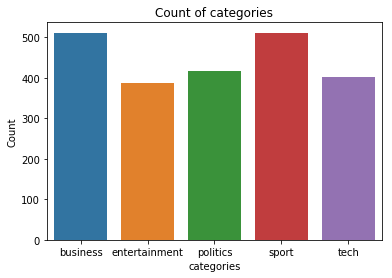

In [45]:
sns.countplot(x=y)
plt.title('Count of categories')
plt.xlabel('categories')
plt.ylabel('Count')
plt.show()

In [14]:
dataframe = {'news':x,'category':y}

In [16]:
## creating a dataframe with the data
news_data = pd.DataFrame(dataframe) 
news_data.head()

,category,news
0,business,Ad sales boost Time Warner profit\n \n Quarter...
1,business,Dollar gains on Greenspan speech\n \n The doll...
2,business,Yukos unit buyer faces loan claim\n \n The own...
3,business,High fuel prices hit BA's profits\n \n British...
4,business,Pernod takeover talk lifts Domecq\n \n Shares ...


In [17]:
### Preprocessing
## removing unwanted symbols in the text
X=[]
for i in x:
    s = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", i)
    s = re.sub(r"\'s", "", s)
    s = re.sub(r"\(", "", s)
    s = re.sub(r"\)", "", s)
    s = re.sub(r"\?", "", s)
    s = re.sub(r"'", "", s)
    s = re.sub(r",", "", s)
    X.append(s)

In [18]:
## tokenizing the data we preprocessed
tokens = [word_tokenize(i)for i in X] 

In [19]:
# we are going to use lemmatization 
lemmatizer = WordNetLemmatizer() 

In [20]:
words=[]
for i in tokens:
    s=[]
    for word in i:
        k = WordNetLemmatizer().lemmatize(word)
        s.append(k)
    s = " ".join(s)    
    words.append(s)

In [21]:
# Using Tf-idf vecctorizer instead of count vectorizer and removing stop words
# we are doing this now for unigram 
vect = TfidfVectorizer(stop_words='english',min_df=2,max_features=50000,ngram_range=(1, 2))

In [22]:
X = vect.fit_transform(words)

In [23]:
Y = np.array(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [25]:
print("train size:", X_train.shape)
print("test size:", X_test.shape)

train size: (1780, 50000)
test size: (445, 50000)


In [26]:
## using naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9595505617977528


In [27]:
## Logistic regression algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predicted1 = lr.predict(X_test)
accuracy = accuracy_score(y_test, predicted1)
print(accuracy)

0.9707865168539326


In [30]:
## Support vector machine with lineara kernel'
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=0.1)
svm.fit(X_train, y_train)
predicted1 = svm.predict(X_test)
accuracy = accuracy_score(y_test, predicted1)
print(accuracy)

0.9056179775280899


In [31]:
## Accuracy seems little less for Svm so we will use Grid search to find out the correct parameter

In [32]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel':['linear','rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7478991596638656, total=   5.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, score=0.7424242424242424, total=   5.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, score=0.7428087986463621, total=   5.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.23025210084033612, total=   6.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22895622895622897, total=   6.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.23011844331641285, total=   6.6s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.7478991596638656, total=   6.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.7424242424242424, total=   6.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.7428087986463621, total=   6.0s
[CV] C=0.1, gamma=0.1, kernel=rbf .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  7.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [37]:
grid.best_params_
###For large values of C, the optimization will choose a smaller-margin hyperplane 
#if that hyperplane does a better job of getting all the training points classified correctly.
#Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane,
#even if that hyperplane misclassifies more points.
## so we will take  C=1,gamma=0.01,kernel='linear'

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
svm = SVC(C=1,gamma=0.01,kernel='linear')
svm.fit(X_train, y_train)
predicted1 = svm.predict(X_test)
accuracy = accuracy_score(y_test, predicted1)
print(accuracy)

0.9752808988764045


In [42]:
print(classification_report(y_test,predicted1))

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       115
entertainment       0.97      0.99      0.98        72
     politics       0.94      0.97      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.97      0.97      0.97        80

  avg / total       0.98      0.98      0.98       445



In [44]:
print(confusion_matrix(y_test,predicted1))

[[110   0   4   0   1]
 [  0  71   1   0   0]
 [  1   0  74   0   1]
 [  1   0   0 101   0]
 [  0   2   0   0  78]]


In [50]:
## checking with kNN
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9393258426966292


Text(0,0.5,'Error Rate')

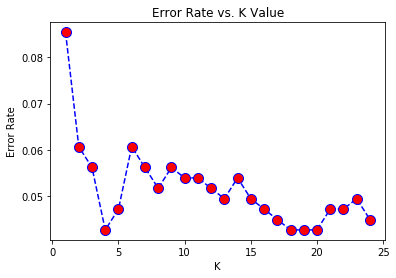

In [51]:
##selecting correct n_neighbors(k Value)
error_rate=[]
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
#we have less error rate at 4 so we will check using k value as --> 4
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)


0.9573033707865168


In [53]:
## n_neigbors value with 4 is better than 6

In [63]:
## random forest classifier - ensamble model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction1=model.predict(X_test)
accuracy = accuracy_score(y_test, prediction1)
print(accuracy)

0.9258426966292135


Text(0.5,15,'Predicted label')

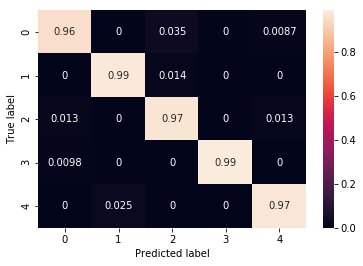

In [64]:
## confusion matrix for Svm - which had best accuracy
conf_mat = confusion_matrix(y_test, predicted1)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')